In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
world  =np.zeros((7,10))
wind = [0,0,0,1,1,1,2,2,1,0]
actions = [[-1,0],[1,0],[0,-1],[0,1]] #["up","down","left","right"]
start = [3,0]
goal = [3,7]
alpa = 0.5  #learning rate
epsilon = 0.1 #epsilon greedy
gamma = 1 #discount factor  
Q = np.zeros((7,10,4))
rewad = -1


In [71]:
import numpy as np

class WindyGridWorld:
    def __init__(self):
        self.world = np.zeros((7, 10))
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.actions = [[-1, 0], [1, 0], [0, -1], [0, 1]]  # ["up", "down", "left", "right"]
        self.start = [3, 0]
        self.goal = [3, 7]
        self.alpa = 0.5  # learning rate
        self.epsilon = 0.1  # epsilon greedy
        self.gamma = 1  # discount factor
        self.Q = np.zeros((7, 10, 4))
        self.reward_value = -1  # reward

    def _move(self, state, action):
        new_state = [state[0] + action[0], state[1] + action[1]]
        if new_state[0] < 0:
            new_state[0] = 0
        if new_state[0] > 6:
            new_state[0] = 6
        if new_state[1] < 0:
            new_state[1] = 0
        if new_state[1] > 9:
            new_state[1] = 9
        return new_state

    def wind_effect(self, state):
        new_state = [state[0] - self.wind[state[1]], state[1]]
        if new_state[0] < 0:
            new_state[0] = 0
        elif new_state[0] > 6:
            new_state[0] = 6
        elif new_state[1] < 0:
            new_state[1] = 0
        elif new_state[1] > 9:
            new_state[1] = 9
        else:
            new_state = new_state
        return new_state
        return new_state

    def move(self, state, action):
        new_state = self._move(state, action)
        new_state = self.wind_effect(new_state)
        return new_state

    def reward(self, state):
        if np.array_equal(state, self.goal):
            return 0
        return self.reward_value

    def epsilon_greedy(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(self.Q[state[0], state[1], :])

    def sarsa(self):
        history = []
        for i in range(20000):
            state = self.start
            action = self.epsilon_greedy(state)
            counter = 0
            while not np.array_equal(state, self.goal):
                counter += 1
                new_state = self.move(state, self.actions[action])
                new_action = self.epsilon_greedy(new_state)
                self.Q[state[0], state[1], action] += self.alpa * (
                    self.reward(state) + self.gamma * self.Q[new_state[0], new_state[1], new_action]
                    - self.Q[state[0], state[1], action]
                )
                state = new_state
                action = new_action
            if i % 1000 == 0:
                history.append(counter)
        return history


In [72]:
env = WindyGridWorld()
history = env.sarsa()

In [73]:
np.argmax(env.Q,axis=2)

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 1],
       [3, 3, 3, 3, 3, 3, 0, 0, 3, 1],
       [3, 3, 3, 3, 3, 0, 0, 3, 3, 1],
       [1, 0, 3, 3, 3, 0, 0, 0, 3, 1],
       [3, 3, 3, 3, 3, 0, 0, 0, 3, 1],
       [3, 1, 0, 3, 0, 0, 0, 0, 2, 1],
       [3, 3, 3, 0, 0, 0, 0, 0, 0, 2]])

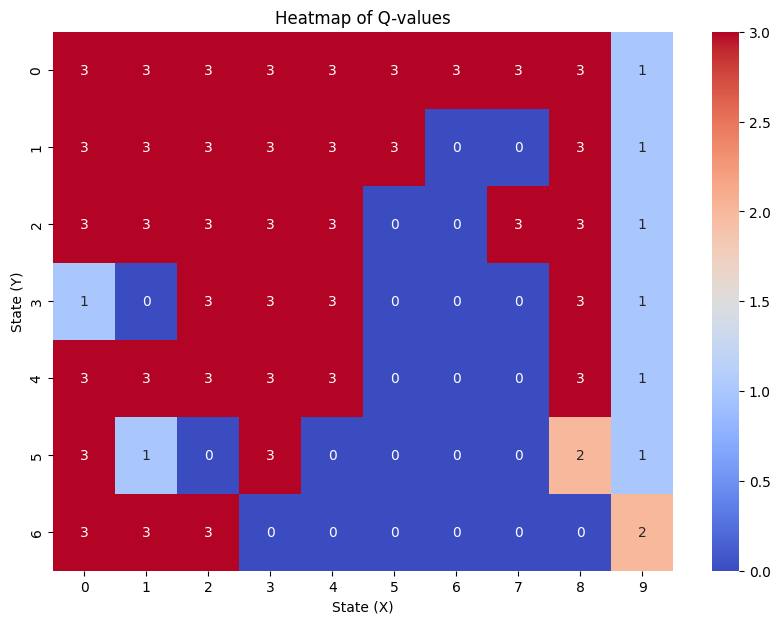

In [74]:
import seaborn as sns

# Qの各アクションの最大値を取得
Q_max = np.argmax(env.Q, axis=2)

# ヒートマップをプロット
plt.figure(figsize=(10, 7))
sns.heatmap(Q_max, annot=True, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Q-values")
plt.xlabel("State (X)")
plt.ylabel("State (Y)")
plt.show()

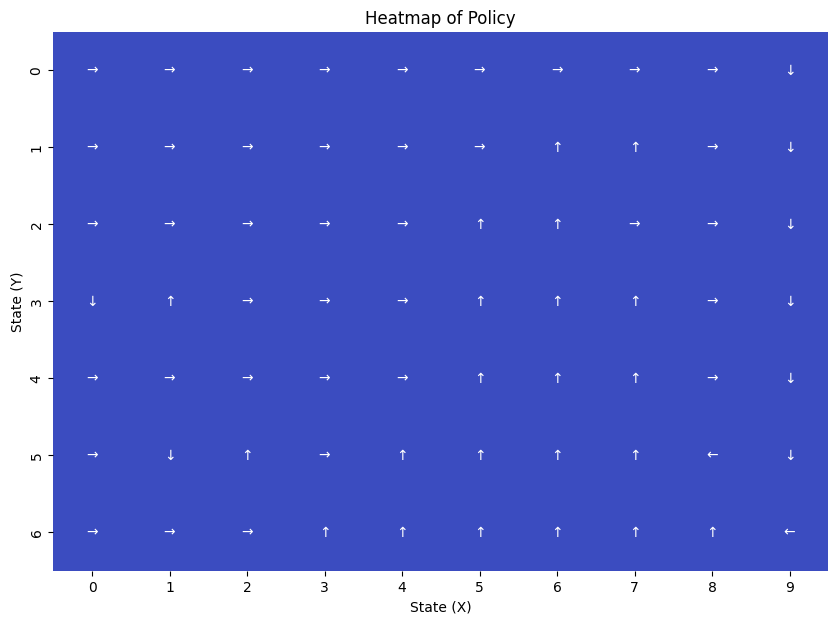

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

action_presentation = ["↑", "↓", "←", "→"]
Q_max_presentaion = np.zeros((7, 10), dtype=str)
for i in range(7):
    for j in range(10):
        Q_max_presentaion[i, j] = action_presentation[Q_max[i, j]]

# ヒートマップをプロット
plt.figure(figsize=(10, 7))
sns.heatmap(np.zeros_like(Q_max), annot=Q_max_presentaion, fmt='', cmap="coolwarm", cbar=False)  # cbar=Falseでカラーバーを非表示
plt.title("Heatmap of Policy")
plt.xlabel("State (X)")
plt.ylabel("State (Y)")
plt.show()
plt.show()


Windy World 2

In [76]:
class WindyGridWorld2:
    def __init__(self):
        self.world = np.zeros((7, 10))
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.actions = [[-1, 0], [1, 0], [0, -1], [0, 1],[-1,-1],[-1,1],[1,-1],[1,1]]  
        # ["↑", "↓", "←", "→",","↖","↗"↙","↘"]
        self.start = [3, 0]
        self.goal = [3, 7]
        self.alpa = 0.5  # learning rate
        self.epsilon = 0.1  # epsilon greedy
        self.gamma = 1  # discount factor
        self.Q = np.zeros((7, 10, 8))
        self.reward_value = -1  # reward

    def _move(self, state, action):
        new_state = [state[0] + action[0], state[1] + action[1]]
        if new_state[0] < 0:
            new_state[0] = 0
        if new_state[0] > 6:
            new_state[0] = 6
        if new_state[1] < 0:
            new_state[1] = 0
        if new_state[1] > 9:
            new_state[1] = 9
        return new_state

    def wind_effect(self, state):
        new_state = [state[0] - self.wind[state[1]], state[1]]
        if new_state[0] < 0:
            new_state[0] = 0
        if new_state[0] > 6:
            new_state[0] = 6
        if new_state[1] < 0:
            new_state[1] = 0
        if new_state[1] > 9:
            new_state[1] = 9
        return new_state

    def move(self, state, action):
        new_state = self._move(state, action)
        new_state = self.wind_effect(new_state)
        return new_state

    def reward(self, state):
        if np.array_equal(state, self.goal):
            return 0
        return self.reward_value

    def epsilon_greedy(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(8)
        else:
            return np.argmax(self.Q[state[0], state[1], :])

    def sarsa(self):
        history = []
        for i in range(20000):
            state = self.start
            action = self.epsilon_greedy(state)
            counter = 0
            while not np.array_equal(state, self.goal):
                counter += 1
                new_state = self.move(state, self.actions[action])
                new_action = self.epsilon_greedy(new_state)
                self.Q[state[0], state[1], action] += self.alpa * (
                    self.reward(state) + self.gamma * self.Q[new_state[0], new_state[1], new_action]
                    - self.Q[state[0], state[1], action]
                )
                state = new_state
                action = new_action
            if i % 1000 == 0:
                history.append(counter)
        return history

In [77]:
env2 = WindyGridWorld2()
history2 = env2.sarsa()

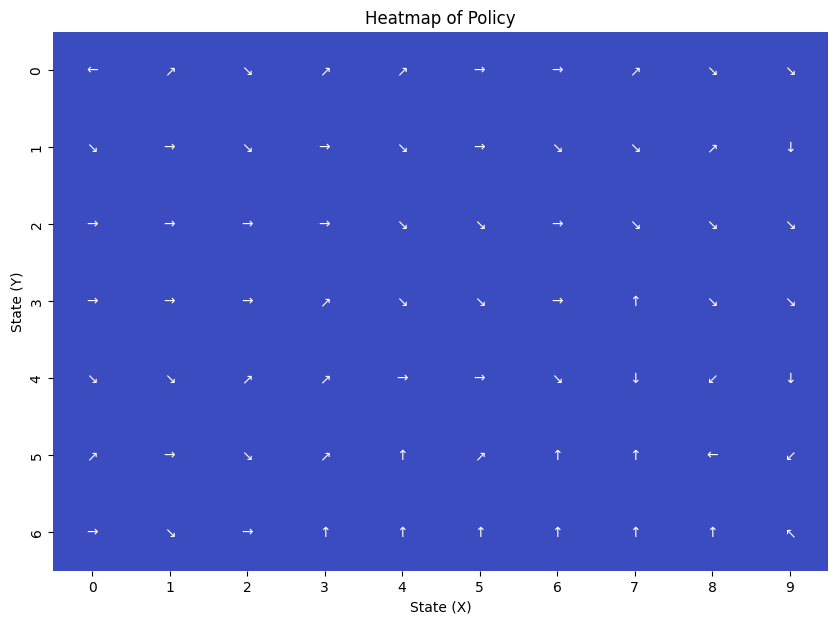

In [78]:
action_presentation = ["↑", "↓", "←", "→","↖","↗","↙","↘"]
Q_max = np.argmax(env2.Q, axis=2)
Q_max_presentaion = np.zeros((7, 10), dtype=str)
for i in range(7):
    for j in range(10):
        Q_max_presentaion[i, j] = action_presentation[Q_max[i, j]]

# ヒートマップをプロット
plt.figure(figsize=(10, 7))
sns.heatmap(np.zeros_like(Q_max), annot=Q_max_presentaion, fmt='', cmap="coolwarm", cbar=False)  # cbar=Falseでカラーバーを非表示
plt.title("Heatmap of Policy")
plt.xlabel("State (X)")
plt.ylabel("State (Y)")
plt.show()

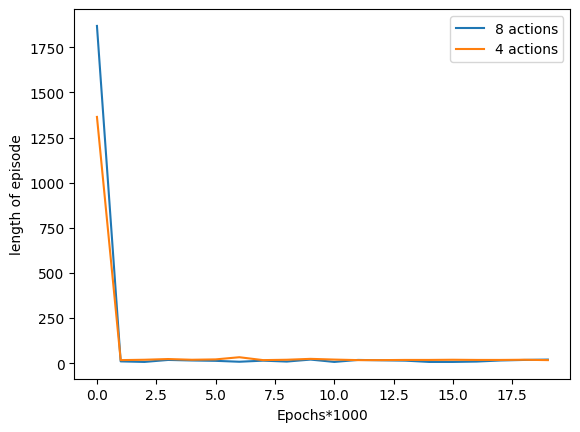

In [79]:
plt.plot(history2, label="8 actions")
plt.plot(history, label="4 actions")
plt.xlabel("Epochs*1000")
plt.ylabel("length of episode")
plt.legend()
plt.show()

In [80]:
history

[1364,
 17,
 19,
 23,
 19,
 21,
 33,
 17,
 19,
 24,
 20,
 17,
 17,
 18,
 18,
 19,
 18,
 18,
 19,
 17]

In [81]:
history2

[1868, 10, 7, 18, 15, 13, 8, 14, 9, 20, 7, 18, 16, 14, 7, 7, 9, 15, 18, 20]

Windy world 3

In [82]:
class WindyGridWorld3:
    def __init__(self):
        self.world = np.zeros((7, 10))
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.actions = [[-1, 0], [1, 0], [0, -1], [0, 1]]  # ["up", "down", "left", "right"]
        self.start = [3, 0]
        self.goal = [3, 7]
        self.alpa = 0.5  # learning rate
        self.epsilon = 0.1  # epsilon greedy
        self.gamma = 1  # discount factor
        self.Q = np.zeros((7, 10, 4))
        self.reward_value = -1  # reward

    def _move(self, state, action):
        new_state = [state[0] + action[0], state[1] + action[1]]
        if new_state[0] < 0:
            new_state[0] = 0
        if new_state[0] > 6:
            new_state[0] = 6
        if new_state[1] < 0:
            new_state[1] = 0
        if new_state[1] > 9:
            new_state[1] = 9
        return new_state

    def wind_effect(self, state):
        dice = np.random.randint(0,3)
        if dice == 0:
            new_state = [state[0] - self.wind[state[1]], state[1]]
        elif dice == 1:
            new_state = [state[0] - self.wind[state[1]]-1, state[1]]
        else:
            new_state = [state[0] - self.wind[state[1]]+1, state[1]]

        if new_state[0] < 0:
            new_state[0] = 0
        elif new_state[0] > 6:
            new_state[0] = 6
        elif new_state[1] < 0:
            new_state[1] = 0
        elif new_state[1] > 9:
            new_state[1] = 9
        else:
            new_state = new_state
        return new_state

    def move(self, state, action):
        new_state = self._move(state, action)
        new_state = self.wind_effect(new_state)
        return new_state

    def reward(self, state):
        if np.array_equal(state, self.goal):
            return 0
        return self.reward_value

    def epsilon_greedy(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(self.Q[state[0], state[1], :])

    def sarsa(self):
        history = []
        for i in range(20000):
            state = self.start
            action = self.epsilon_greedy(state)
            counter = 0
            while not np.array_equal(state, self.goal):
                counter += 1
                new_state = self.move(state, self.actions[action])
                new_action = self.epsilon_greedy(new_state)
                self.Q[state[0], state[1], action] += self.alpa * (
                    self.reward(state) + self.gamma * self.Q[new_state[0], new_state[1], new_action]
                    - self.Q[state[0], state[1], action]
                )
                state = new_state
                action = new_action
            if i % 1000 == 0:
                history.append(counter)
        return history

In [61]:
env3 = WindyGridWorld3()
history3 = env3.sarsa()

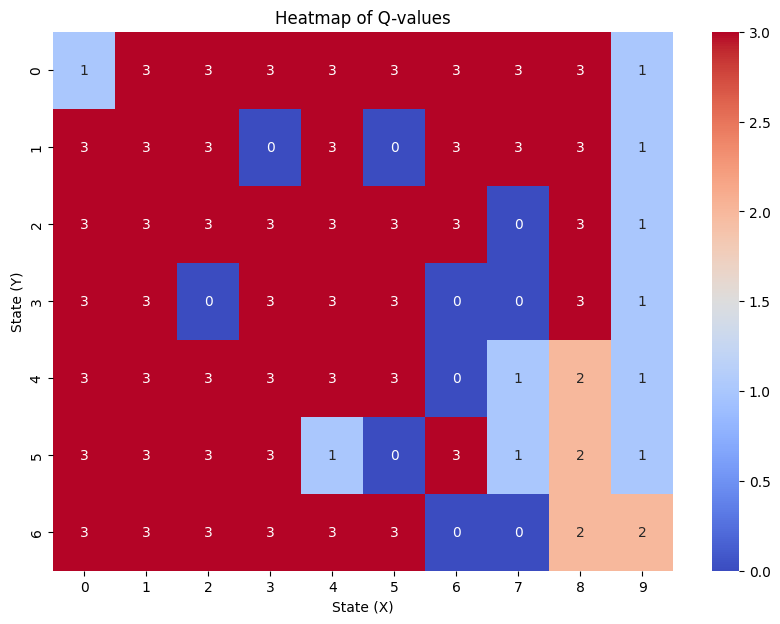

In [62]:
import seaborn as sns

# Qの各アクションの最大値を取得
Q_max = np.argmax(env.Q, axis=2)

# ヒートマップをプロット
plt.figure(figsize=(10, 7))
sns.heatmap(Q_max, annot=True, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Q-values")
plt.xlabel("State (X)")
plt.ylabel("State (Y)")
plt.show()

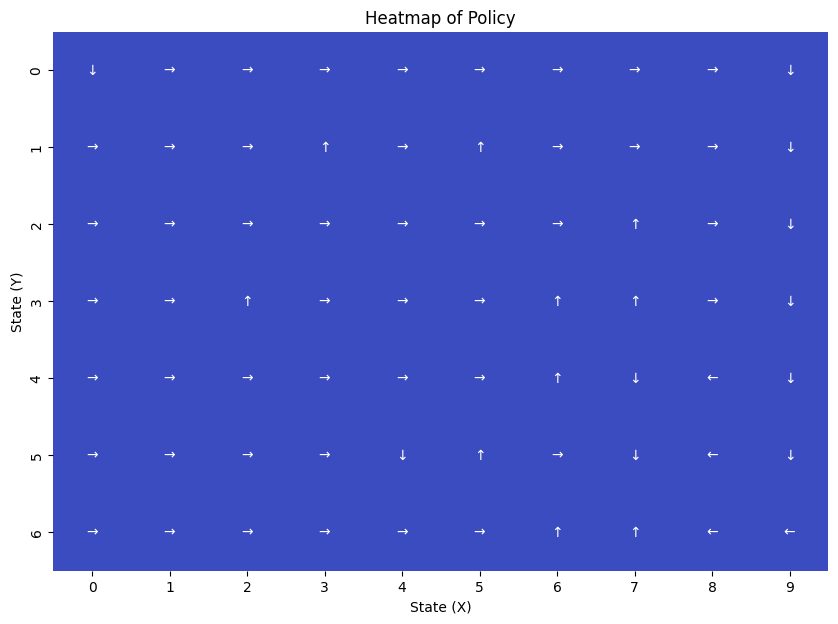

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

action_presentation = ["↑", "↓", "←", "→"]
Q_max_presentaion = np.zeros((7, 10), dtype=str)
for i in range(7):
    for j in range(10):
        Q_max_presentaion[i, j] = action_presentation[Q_max[i, j]]

# ヒートマップをプロット
plt.figure(figsize=(10, 7))
sns.heatmap(np.zeros_like(Q_max), annot=Q_max_presentaion, fmt='', cmap="coolwarm", cbar=False)  # cbar=Falseでカラーバーを非表示
plt.title("Heatmap of Policy")
plt.xlabel("State (X)")
plt.ylabel("State (Y)")
plt.show()
plt.show()

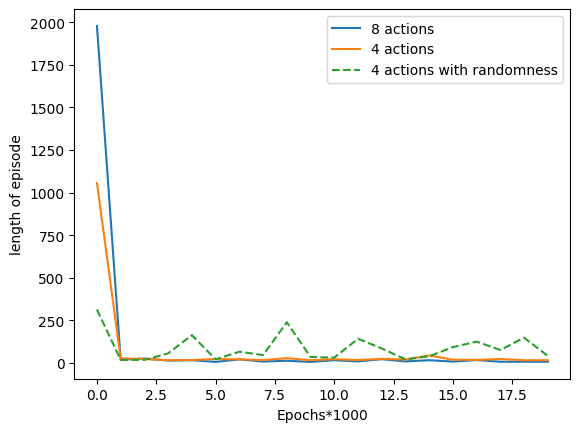

In [68]:
plt.plot(history2, label="8 actions")
plt.plot(history, label="4 actions")
plt.plot(history3, label="4 actions with randomness",linestyle="dashed")
plt.xlabel("Epochs*1000")
plt.ylabel("length of episode")
plt.legend()
plt.show()

In [66]:
history3

[314,
 19,
 19,
 57,
 164,
 22,
 67,
 47,
 240,
 36,
 32,
 143,
 86,
 22,
 40,
 94,
 126,
 77,
 149,
 42]